In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [3]:
# LOAD THE DATASET

df = pd.read_csv('/content/spam.csv', encoding='latin-1')  # Some versions have encoding issues
df = df[['v1', 'v2']]  # Keep only label and text columns
df.columns = ['label', 'text']  # Rename columns

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


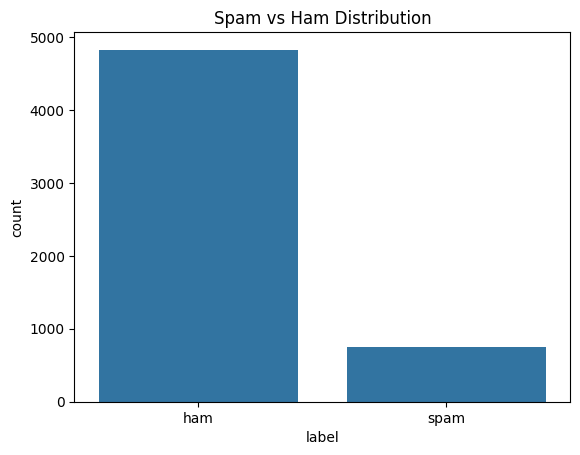

In [4]:
# BASIC EDA

print(df.head())
print("\nLabel Distribution:")
print(df['label'].value_counts())

# Visualize class distribution
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

In [5]:
# NULL VALUE TREATMENT

df.isnull().sum()

,0
label,0
text,0


In [7]:
# TEXT PREPROCESSING

# CLEAN TEXT DATA
nltk.download('stopwords')
stemmer = PorterStemmer()

def clean_text(text):
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and stem words
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stopwords.words('english')])
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# FEATURE EXTRACTION(TF-IDF)


tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary

In [11]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL TRANING AND EVALUATION

In [12]:
# 1. NAIVE_BAYES

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

[[965   0]
 [ 29 121]]


In [13]:
# SUPPORT VECTOR MACHINE

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [14]:
# RANDOM FOREST

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [16]:
# MODEL COMPARISON

models = ['Naive Bayes', 'SVM', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)]
accuracies

[0.9739910313901345, 0.9802690582959641, 0.9739910313901345]

In [17]:
# BEST MODEL

best_model = models[np.argmax(accuracies)]
print(f"The best-performing model is: {best_model}")


The best-performing model is: SVM
